In [5]:
# Import libraries
# import my_functions as mf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import env
from scipy import stats

## Birthday Problem

While working on the simulation exercises, we have the following question:

>If 23 people are in the same room, what are the odds that two of them share a birthday? What if it's 20 people? 40?

It's a little amiguous, although we can assume it's the standard birthday problem, which states that for *n* number of people in a room, there is a probability that at least two of them share the same birthday.

*However*, what if we followed the question exactly and only searched for *exactly* two of them sharing a birthday? The following is my search to understand and graph this problem.

In [7]:
# Establish probabilities and number of events
p = 1/365
n = 100
birthdays = list(range(1,366))
n_trials = 100_000

In [10]:
# Create the random array of birthdays
birthday_df = pd.DataFrame(np.random.choice(birthdays,(n_trials,n)))
birthday_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,56,102,124,42,127,67,12,299,276,189,...,64,45,82,285,312,176,302,344,240,61
1,73,210,325,85,354,65,190,357,210,218,...,205,224,85,42,277,107,172,31,18,334
2,64,188,98,237,124,108,148,235,310,291,...,279,100,86,115,130,157,163,152,277,166
3,142,210,156,129,318,5,323,262,239,24,...,48,81,146,343,250,79,282,196,194,214
4,163,76,46,309,269,39,317,274,70,223,...,114,62,320,199,291,133,73,319,119,114


In [12]:
# (birthday_df.nunique(axis=1) == n-1).mean()

In [14]:
# Basic create an iterable list
domain = list(range(101))
domain[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

***The following code is computationally intensive!***

'exactly_two' and 'at_least_two' use list comprehension to iterate over domain. For each iteration, the code slices the above DataFrame to *n*. It then calculates the respective probabilities. This calculation will then be added to the list.

Because it calculates per iteration, this calculation becomes exponentially more intensive the higher the domain goes.

In [17]:
# Probability that only 2 individuals in the room per n size have the same birthday 
exactly_two = [(birthday_df.iloc[:,:n].nunique(axis=1) == n-1).mean() for n in domain]

In [18]:
# Probability that at least 2 individuals in the room per n size have the same birthday
at_least_two = [(birthday_df.iloc[:,:n].nunique(axis=1) < n).mean() for n in domain]

In [21]:
# Probability of no individuals in the room per n size having the same birthday
no_shares = 1.0 - pd.Series(at_least_two)

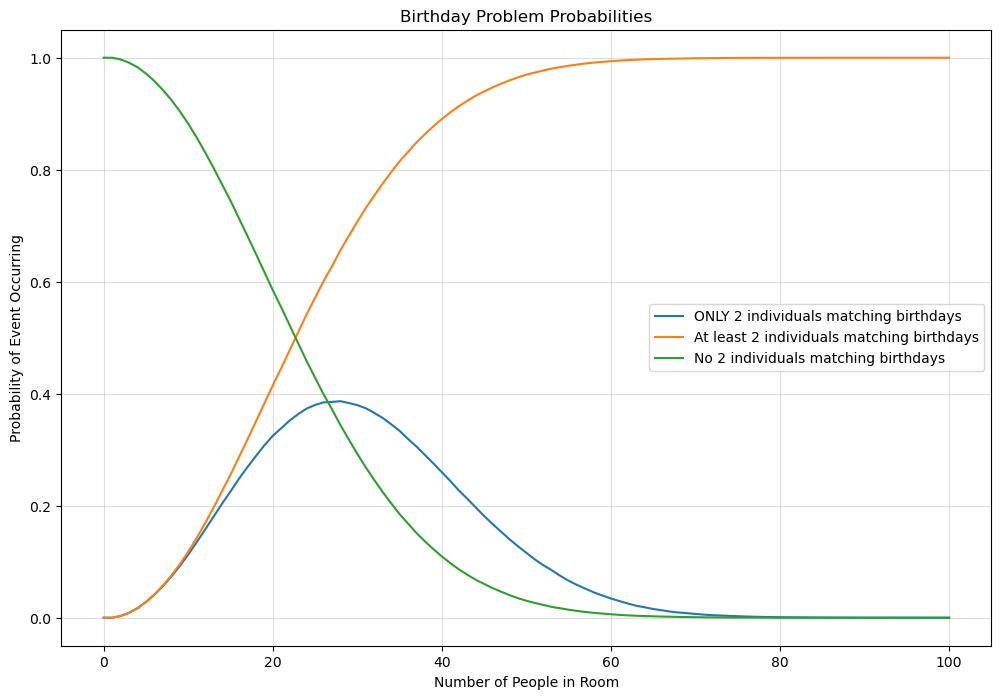

In [23]:
plt.figure(figsize=(12,8))
plt.plot(exactly_two,label='ONLY 2 individuals matching birthdays')
plt.plot(at_least_two,label='At least 2 individuals matching birthdays')
plt.plot(no_shares,label='No 2 individuals matching birthdays')

plt.title('Birthday Problem Probabilities')
plt.xlabel('Number of People in Room')
plt.ylabel('Probability of Event Occurring')

plt.grid(alpha=0.4)
plt.legend()
# plt.axvspan(xmin=23,xmax=23,linestyle='--',alpha=0.5,color='red')

plt.show()

## Next project...?